In [1]:
from itertools import *
import numpy as np
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go

In [2]:
a=np.linspace(0,100,101)
b=np.linspace(0,100,101)
c=np.linspace(0,100,101)
d= list(product(a, b,c))


In [3]:
#lets make d list a numpy array
d=np.array(d)
d[1:10,:],d[-10:-1,:]

(array([[0., 0., 1.],
        [0., 0., 2.],
        [0., 0., 3.],
        [0., 0., 4.],
        [0., 0., 5.],
        [0., 0., 6.],
        [0., 0., 7.],
        [0., 0., 8.],
        [0., 0., 9.]]),
 array([[100., 100.,  91.],
        [100., 100.,  92.],
        [100., 100.,  93.],
        [100., 100.,  94.],
        [100., 100.,  95.],
        [100., 100.,  96.],
        [100., 100.,  97.],
        [100., 100.,  98.],
        [100., 100.,  99.]]))

In [4]:
#keep those with sum == 100
#see one random example
all_one_hundred=d[d.sum(axis=1)==100]
all_one_hundred[3256,:]


array([39., 58.,  3.])

In [5]:
#all tests passed
for i in range(all_one_hundred.shape[0]):
    assert all_one_hundred[i,:].sum() == 100


In [6]:
#all_one_hundred divided by 100 , to become ratios, totalling 1
all_one_hundred=all_one_hundred/100
all_one_hundred[3256,:]

array([0.39, 0.58, 0.03])

In [7]:
#Lets choose Three Assets for our portfolio  + our benchmark which will be ^GSPC"
#BAKKT HOLDINGS BECAUSE IT HAS NEVATIVE CORRELATION TO BITCOIN APPARENTLY
#BITCOIN OBVIOUSLY
#GOLD which for the time being seems like an independent entity
data = yf.download("BTC-USD BKKT GLD ^GSPC", start="2021-01-01")

[*********************100%***********************]  4 of 4 completed


In [8]:
#I forgot to mention, we are going to take two years into account for better predictions
data

Adj Close                                         Close  \
                BKKT       BTC-USD         GLD        ^GSPC   BKKT   
Date                                                                 
2020-12-31     10.08  29001.720703  178.360001  3756.070068  10.08   
2021-01-01       NaN  29374.152344         NaN          NaN    NaN   
2021-01-02       NaN  32127.267578         NaN          NaN    NaN   
2021-01-03       NaN  32782.023438         NaN          NaN    NaN   
2021-01-04     10.25  31971.914062  182.330002  3700.649902  10.25   
...              ...           ...         ...          ...    ...   
2022-08-24      2.67  21395.019531  163.250000  4140.770020   2.67   
2022-08-25      2.79  21600.904297  163.750000  4199.120117   2.79   
2022-08-26      2.63  20260.019531  161.759995  4057.659912   2.63   
2022-08-27       NaN  20041.738281         NaN          NaN    NaN   
2022-08-29       NaN  19665.695312         NaN          NaN    NaN   

                                                     High                ...  \
                 BTC-USD         GLD        ^GSPC    BKKT       BTC-USD  ...   
Date                                                                     ...   
2020-12-31  29001.720703  178.360001  3756.070068  10.175  29244.876953  ...   
2021-01-01  29374.152344         NaN          NaN     NaN  29600.626953  ...   
2021-01-02  32127.267578         NaN          NaN     NaN  33155.117188  ...   
2021-01-03  32782.023438         NaN          NaN     NaN  34608.558594  ...   
2021-01-04  31971.914062  182.330002  3700.649902  10.290  33440.218750  ...   
...                  ...         ...          ...     ...           ...  ...   
2022-08-24  21395.019531  163.250000  4140.770020   2.710  21783.076172  ...   
2022-08-25  21600.904297  163.750000  4199.120117   2.795  21789.636719  ...   
2022-08-26  20260.019531  161.759995  4057.659912   2.859  21804.908203  ...   
2022-08-27  20041.738281         NaN          NaN     NaN  20340.775391  ...   
2022-08-29  19665.695312         NaN          NaN     NaN  19708.318359  ...   

                   Low                Open                            \
                   GLD        ^GSPC   BKKT       BTC-USD         GLD   
Date                                                                   
2020-12-31  177.320007  3726.879883  10.02  28841.574219  178.070007   
2021-01-01         NaN          NaN    NaN  28994.009766         NaN   
2021-01-02         NaN          NaN    NaN  29376.455078         NaN   
2021-01-03         NaN          NaN    NaN  32129.408203         NaN   
2021-01-04  180.960007  3662.709961  10.24  32810.949219  181.970001   
...                ...          ...    ...           ...         ...   
2022-08-24  162.369995  4119.970215   2.62  21526.455078  162.440002   
2022-08-25  163.240005  4147.589844   2.72  21395.458984  163.970001   
2022-08-26  161.550003  4057.659912   2.80  21596.085938  163.119995   
2022-08-27         NaN          NaN    NaN  20262.480469         NaN   
2022-08-29         NaN          NaN    NaN  19629.597656         NaN   

                            Volume                                         
                  ^GSPC       BKKT      BTC-USD         GLD         ^GSPC  
Date                                                                       
2020-12-31  3733.270020     4300.0  46754964848   7540800.0  3.172510e+09  
2021-01-01          NaN        NaN  40730301359         NaN           NaN  
2021-01-02          NaN        NaN  67865420765         NaN           NaN  
2021-01-03          NaN        NaN  78665235202         NaN           NaN  
2021-01-04  3764.610107     5400.0  81163475344  14331400.0  5.006680e+09  
...                 ...        ...          ...         ...           ...  
2022-08-24  4126.549805   859400.0  31962253368   3202400.0  3.056910e+09  
2022-08-25  4153.259766  1307700.0  31028679593   2857500.0  2.976050e+09  
2022-08-26  4198.740234  1527700.0  42326789564   6685700.0  3.1

In [9]:
days=data.index.dayofweek

In [10]:
data2=data[days<5]
data2=data2['Close']

In [11]:
#we have 432 trading days
data2

BKKT       BTC-USD         GLD        ^GSPC
Date                                                    
2020-12-31  10.08  29001.720703  178.360001  3756.070068
2021-01-01    NaN  29374.152344         NaN          NaN
2021-01-04  10.25  31971.914062  182.330002  3700.649902
2021-01-05  10.28  33992.429688  182.869995  3726.860107
2021-01-06  10.17  36824.363281  179.899994  3748.139893
...           ...           ...         ...          ...
2022-08-23   2.60  21528.087891  162.770004  4128.729980
2022-08-24   2.67  21395.019531  163.250000  4140.770020
2022-08-25   2.79  21600.904297  163.750000  4199.120117
2022-08-26   2.63  20260.019531  161.759995  4057.659912
2022-08-29    NaN  19665.695312         NaN          NaN

[433 rows x 4 columns]

In [12]:
data_perc=data2.pct_change().iloc[1:,:]

In [13]:
#data_perc
data_perc.isna().sum(axis=0)

BKKT       0
BTC-USD    0
GLD        0
^GSPC      0
dtype: int64

In [14]:
data_perc

BKKT   BTC-USD       GLD     ^GSPC
Date                                              
2021-01-01  0.000000  0.012842  0.000000  0.000000
2021-01-04  0.016865  0.088437  0.022258 -0.014755
2021-01-05  0.002927  0.063197  0.002962  0.007083
2021-01-06 -0.010700  0.083311 -0.016241  0.005710
2021-01-07  0.023599  0.069157 -0.002335  0.014847
...              ...       ...       ...       ...
2022-08-23  0.027668  0.006037  0.006991 -0.002238
2022-08-24  0.026923 -0.006181  0.002949  0.002916
2022-08-25  0.044944  0.009623  0.003063  0.014092
2022-08-26 -0.057348 -0.062075 -0.012153 -0.033688
2022-08-29  0.000000 -0.029335  0.000000  0.000000

[432 rows x 4 columns]

In [15]:
def create_wreturns_column(dataframe):
    df=np.dot(dataframe.iloc[0:1,:-1],all_one_hundred.T)
    return df

In [54]:
all_one_hundred.T

(3, 5151)

In [17]:
data_perc.iloc[0:1,:-1]

BKKT   BTC-USD  GLD
Date                           
2021-01-01   0.0  0.012842  0.0

In [18]:
#this series is the return of each of the 5151 portfolios on the first day of the dataset 2021-01-01
firstday=create_wreturns_column(data_perc)
firstday.shape

(1, 5151)

In [19]:
#Think of it like this, columns--> different return depending on portfolio weighting of each asset
#Every fow is a different day of trading
firstday

array([[0.        , 0.00012842, 0.00025683, ..., 0.        , 0.00012842,
        0.        ]])

In [20]:
portfolios=data_perc.iloc[:,:-1].dot(all_one_hundred.T)

In [21]:
portfolios.tail(10)

0         1         2         3         4         5     \
Date                                                                     
2022-08-16 -0.001750 -0.001838 -0.001925 -0.002013 -0.002100 -0.002188   
2022-08-17 -0.006468 -0.006633 -0.006797 -0.006962 -0.007126 -0.007291   
2022-08-18 -0.002616 -0.002643 -0.002670 -0.002696 -0.002723 -0.002750   
2022-08-19 -0.007321 -0.008253 -0.009186 -0.010119 -0.011052 -0.011985   
2022-08-22 -0.006637 -0.006321 -0.006005 -0.005689 -0.005373 -0.005057   
2022-08-23  0.006991  0.006981  0.006972  0.006962  0.006953  0.006943   
2022-08-24  0.002949  0.002858  0.002766  0.002675  0.002584  0.002492   
2022-08-25  0.003063  0.003128  0.003194  0.003260  0.003325  0.003391   
2022-08-26 -0.012153 -0.012652 -0.013151 -0.013650 -0.014150 -0.014649   
2022-08-29  0.000000 -0.000293 -0.000587 -0.000880 -0.001173 -0.001467   

                6         7         8         9     ...      5141      5142  \
Date                                                ...                       
2022-08-16 -0.002276 -0.002363 -0.002451 -0.002538  ... -0.043100 -0.043187   
2022-08-17 -0.007455 -0.007620 -0.007784 -0.007949  ... -0.048244 -0.048408   
2022-08-18 -0.002776 -0.002803 -0.002830 -0.002856  ... -0.041153 -0.041180   
2022-08-19 -0.012917 -0.013850 -0.014783 -0.015716  ... -0.089301 -0.090234   
2022-08-22 -0.004741 -0.004425 -0.004108 -0.003792  ... -0.051061 -0.050744   
2022-08-23  0.006934  0.006924  0.006915  0.006905  ...  0.027048  0.027038   
2022-08-24  0.002401  0.002310  0.002219  0.002127  ...  0.026204  0.026113   
2022-08-25  0.003456  0.003522  0.003588  0.003653  ...  0.043687  0.043753   
2022-08-26 -0.015148 -0.015647 -0.016147 -0.016646  ... -0.055992 -0.056491   
2022-08-29 -0.001760 -0.002053 -0.002347 -0.002640  ...  0.000000 -0.000293   

                5143      5144      5145      5146      5147      5148  \
Date                                                                     
2022-08-16 -0.043275 -0.043363 -0.043526 -0.043614 -0.043701 -0.043952   
2022-08-17 -0.048573 -0.048737 -0.048674 -0.048839 -0.049003 -0.049105   
2022-08-18 -0.041207 -0.041233 -0.041551 -0.041577 -0.041604 -0.041948   
2022-08-19 -0.091167 -0.092100 -0.090146 -0.091079 -0.092012 -0.090992   
2022-08-22 -0.050428 -0.050112 -0.051519 -0.051202 -0.050886 -0.051977   
2022-08-23  0.027029  0.027019  0.027254  0.027245  0.027235  0.027461   
2022-08-24  0.026021  0.025930  0.026444  0.026352  0.026261  0.026683   
2022-08-25  0.043819  0.043884  0.044106  0.044172  0.044237  0.044525   
2022-08-26 -0.056990 -0.057489 -0.056444 -0.056943 -0.057442 -0.056896   
2022-08-29 -0.000587 -0.000880  0.000000 -0.000293 -0.000587  0.000000   

                5149      5150  
Date                            
2022-08-16 -0.044040 -0.044379  
2022-08-17 -0.049269 -0.049536  
2022-08-18 -0.041975 -0.042345  
2022-08-19 -0.091924 -0.091837  
2022-08-22 -0.051660 -0.052434  
2022-08-23  0.027452  0.027668  
2022-08-24  0.026592  0.026923  
2022-08-25  0.044591  0.044944  
2022-08-26 -0.057395 -0.057348  
2022-08-29 -0.000293  0.000000  

[10 rows x 5151 columns]

In [22]:
#renaming the column names
new_column_names=['Portfolio: '+str(i) for i in range(5151)]
portfolios.columns=new_column_names

In [23]:
portfolios.tail(10)

Portfolio: 0  Portfolio: 1  Portfolio: 2  Portfolio: 3  \
Date                                                                 
2022-08-16     -0.001750     -0.001838     -0.001925     -0.002013   
2022-08-17     -0.006468     -0.006633     -0.006797     -0.006962   
2022-08-18     -0.002616     -0.002643     -0.002670     -0.002696   
2022-08-19     -0.007321     -0.008253     -0.009186     -0.010119   
2022-08-22     -0.006637     -0.006321     -0.006005     -0.005689   
2022-08-23      0.006991      0.006981      0.006972      0.006962   
2022-08-24      0.002949      0.002858      0.002766      0.002675   
2022-08-25      0.003063      0.003128      0.003194      0.003260   
2022-08-26     -0.012153     -0.012652     -0.013151     -0.013650   
2022-08-29      0.000000     -0.000293     -0.000587     -0.000880   

            Portfolio: 4  Portfolio: 5  Portfolio: 6  Portfolio: 7  \
Date                                                                 
2022-08-16     -0.002100     -0.002188     -0.002276     -0.002363   
2022-08-17     -0.007126     -0.007291     -0.007455     -0.007620   
2022-08-18     -0.002723     -0.002750     -0.002776     -0.002803   
2022-08-19     -0.011052     -0.011985     -0.012917     -0.013850   
2022-08-22     -0.005373     -0.005057     -0.004741     -0.004425   
2022-08-23      0.006953      0.006943      0.006934      0.006924   
2022-08-24      0.002584      0.002492      0.002401      0.002310   
2022-08-25      0.003325      0.003391      0.003456      0.003522   
2022-08-26     -0.014150     -0.014649     -0.015148     -0.015647   
2022-08-29     -0.001173     -0.001467     -0.001760     -0.002053   

            Portfolio: 8  Portfolio: 9  ...  Portfolio: 5141  Portfolio: 5142  \
Date                                    ...                                     
2022-08-16     -0.002451     -0.002538  ...        -0.043100        -0.043187   
2022-08-17     -0.007784     -0.007949  ...        -0.048244        -0.048408   
2022-08-18     -0.002830     -0.002856  ...        -0.041153        -0.041180   
2022-08-19     -0.014783     -0.015716  ...        -0.089301        -0.090234   
2022-08-22     -0.004108     -0.003792  ...        -0.051061        -0.050744   
2022-08-23      0.006915      0.006905  ...         0.027048         0.027038   
2022-08-24      0.002219      0.002127  ...         0.026204         0.026113   
2022-08-25      0.003588      0.003653  ...         0.043687         0.043753   
2022-08-26     -0.016147     -0.016646  ...        -0.055992        -0.056491   
2022-08-29     -0.002347     -0.002640  ...         0.000000        -0.000293   

            Portfolio: 5143  Portfolio: 5144  Portfolio: 5145  \
Date                                                            
2022-08-16        -0.043275        -0.043363        -0.043526   
2022-08-17        -0.048573        -0.048737        -0.048674   
2022-08-18        -0.041207        -0.041233        -0.041551   
2022-08-19        -0.091167        -0.092100        -0.090146   
2022-08-22        -0.050428        -0.050112        -0.051519   
2022-08-23         0.027029         0.027019         0.027254   
2022-08-24         0.026021         0.025930         0.026444   
2022-08-25         0.043819         0.043884         0.044106   
2022-08-26        -0.056990        -0.057489        -0.056444   
2022-08-29        -0.000587        -0.000880         0.000000   

            Portfolio: 5146  Portfolio: 5147  Portfolio: 5148  \
Date                                                            
2022-08-16        -0.043614        -0.043701        -0.043952   
2022-08-17        -0.048839        -0.049003        -0.049105   
2022-08-18        -0.041577        -0.041604        -0.041948   
2022-08-19        -0.091079        -0.092012        -0.090992   
2022-08-22        -0.051202        -0.050886        -0.051977   
2022-08-23         0.027245         0.027235         0.027461   
2022-08-24         0.026352         0.026261         0.0

In [24]:
#Now lets add the ^GSPC column at the end of portfolios dataframe to find the beta for each portfolio 
#as we saw in the previous article we need the covariance for that.
portfolios['^GSPC']=data_perc['^GSPC']

In [25]:
#voila!
portfolios.iloc[:,-4:]

Portfolio: 5148  Portfolio: 5149  Portfolio: 5150     ^GSPC
Date                                                                   
2021-01-01         0.000000         0.000128         0.000000  0.000000
2021-01-04         0.016919         0.017581         0.016865 -0.014755
2021-01-05         0.002927         0.003530         0.002927  0.007083
2021-01-06        -0.010756        -0.009760        -0.010700  0.005710
2021-01-07         0.023339         0.024054         0.023599  0.014847
...                     ...              ...              ...       ...
2022-08-23         0.027461         0.027452         0.027668 -0.002238
2022-08-24         0.026683         0.026592         0.026923  0.002916
2022-08-25         0.044525         0.044591         0.044944  0.014092
2022-08-26        -0.056896        -0.057395        -0.057348 -0.033688
2022-08-29         0.000000        -0.000293         0.000000  0.000000

[432 rows x 4 columns]

In [26]:
covariances=portfolios.cov()
covariances.tail(5)

Portfolio: 0  Portfolio: 1  Portfolio: 2  Portfolio: 3  \
Portfolio: 5147     -0.000022     -0.000008      0.000005      0.000019   
Portfolio: 5148     -0.000022     -0.000008      0.000005      0.000018   
Portfolio: 5149     -0.000022     -0.000009      0.000005      0.000018   
Portfolio: 5150     -0.000023     -0.000009      0.000004      0.000018   
^GSPC                0.000005      0.000007      0.000009      0.000011   

                 Portfolio: 4  Portfolio: 5  Portfolio: 6  Portfolio: 7  \
Portfolio: 5147      0.000033      0.000046      0.000060      0.000074   
Portfolio: 5148      0.000032      0.000045      0.000058      0.000072   
Portfolio: 5149      0.000032      0.000045      0.000059      0.000073   
Portfolio: 5150      0.000031      0.000045      0.000058      0.000072   
^GSPC                0.000013      0.000015      0.000017      0.000019   

                 Portfolio: 8  Portfolio: 9  ...  Portfolio: 5142  \
Portfolio: 5147      0.000087      0.000101  ...         0.018233   
Portfolio: 5148      0.000085      0.000098  ...         0.018392   
Portfolio: 5149      0.000086      0.000100  ...         0.018406   
Portfolio: 5150      0.000085      0.000099  ...         0.018578   
^GSPC                0.000021      0.000023  ...         0.000332   

                 Portfolio: 5143  Portfolio: 5144  Portfolio: 5145  \
Portfolio: 5147         0.018247         0.018260         0.018407   
Portfolio: 5148         0.018406         0.018419         0.018569   
Portfolio: 5149         0.018419         0.018433         0.018582   
Portfolio: 5150         0.018592         0.018605         0.018756   
^GSPC                   0.000334         0.000336         0.000333   

                 Portfolio: 5146  Portfolio: 5147  Portfolio: 5148  \
Portfolio: 5147         0.018421         0.018435         0.018595   
Portfolio: 5148         0.018582         0.018595         0.018758   
Portfolio: 5149         0.018595         0.018609         0.018772   
Portfolio: 5150         0.018770         0.018783         0.018948   
^GSPC                   0.000335         0.000337         0.000336   

                 Portfolio: 5149  Portfolio: 5150     ^GSPC  
Portfolio: 5147         0.018609         0.018783  0.000337  
Portfolio: 5148         0.018772         0.018948  0.000336  
Portfolio: 5149         0.018785         0.018961  0.000338  
Portfolio: 5150         0.018961         0.019140  0.000340  
^GSPC                   0.000338         0.000340  0.000127  

[5 rows x 5152 columns]

In [27]:
#Notice on the matrix above, that all covariances between SNP and the portfolios can be 
#found on the last row of the dataframe
#Specifically the last cell of the last row, is the cov of BTC with itself therefore it is SNP variance
#the following takes all elements of last row and divides with the SNP VARIANCE
betas=covariances.iloc[-1,:-1]/covariances.iloc[-1,-1]

In [28]:
#betas for each portfolio
betas

Portfolio: 0       0.042079
Portfolio: 1       0.057756
Portfolio: 2       0.073432
Portfolio: 3       0.089109
Portfolio: 4       0.104785
                     ...   
Portfolio: 5146    2.637994
Portfolio: 5147    2.653670
Portfolio: 5148    2.648647
Portfolio: 5149    2.664323
Portfolio: 5150    2.674976
Name: ^GSPC, Length: 5151, dtype: float64

In [29]:
#damn the last portfolio is the one with the highest beta, a very risky portfolio
#lets check what portfolio has the max beta
betas.argmax()

5150

In [30]:
#and now lets see what are the exact weights of the last portfolio
#It is the one that has 100% of its assets ON BAKKT
all_one_hundred[-1,:]

array([1., 0., 0.])

In [31]:
#Now that we have the beta for each portfolio
#lets calculate the risk free rate and the historical return of the markets
#as we did in the previous video (only this time with more data)
#In just two days time, the treasury rate climbed even higher
#annual USA inflation rate  => 8.5%
rf=((1+0.0335)/(1+0.085))-1
rf

-0.04746543778801837

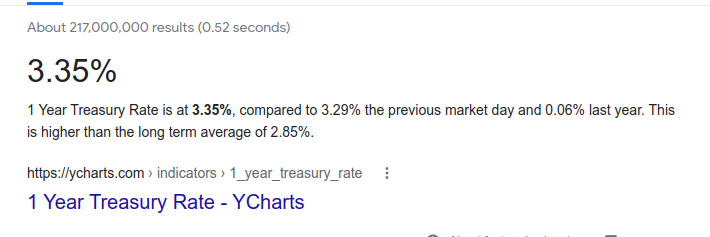


In [32]:
r_market=np.product(data_perc['^GSPC']+1)**(1/(data_perc['^GSPC'].shape[0]))-1
r_market

0.0001787965722424012

In [33]:
#You may be surpised with this result, because in the previous article that number was slightly negative
#This time though, We have taken two years worth of data, from 2020 to 2022.
#In the year that has been included, we know that the markets were bullish (bubbly!)

In [34]:
#And now for the part where we calculate the risk of every portfolio, and the Expected return of each portfolio
#that will help us plot the elliptical curve I am waiting for as well
#we dont need the last column anymore
portfolios2=portfolios.iloc[:,:-1]


In [35]:
#And here are the risks of every portfolio measured in standard deviations
risks=portfolios2.std(axis=0)
risks

Portfolio: 0       0.008684
Portfolio: 1       0.008621
Portfolio: 2       0.008585
Portfolio: 3       0.008574
Portfolio: 4       0.008590
                     ...   
Portfolio: 5146    0.135674
Portfolio: 5147    0.135774
Portfolio: 5148    0.136961
Portfolio: 5149    0.137059
Portfolio: 5150    0.138346
Length: 5151, dtype: float64

In [36]:
E_returns = rf + betas*(r_market-rf)

In [37]:
E_returns[737]

0.0014117725624888597

In [38]:
portfolios2

Portfolio: 0  Portfolio: 1  Portfolio: 2  Portfolio: 3  \
Date                                                                 
2021-01-01      0.000000      0.000128      0.000257      0.000385   
2021-01-04      0.022258      0.022920      0.023582      0.024244   
2021-01-05      0.002962      0.003564      0.004166      0.004769   
2021-01-06     -0.016241     -0.015246     -0.014250     -0.013254   
2021-01-07     -0.002335     -0.001620     -0.000905     -0.000190   
...                  ...           ...           ...           ...   
2022-08-23      0.006991      0.006981      0.006972      0.006962   
2022-08-24      0.002949      0.002858      0.002766      0.002675   
2022-08-25      0.003063      0.003128      0.003194      0.003260   
2022-08-26     -0.012153     -0.012652     -0.013151     -0.013650   
2022-08-29      0.000000     -0.000293     -0.000587     -0.000880   

            Portfolio: 4  Portfolio: 5  Portfolio: 6  Portfolio: 7  \
Date                                                                 
2021-01-01      0.000514      0.000642      0.000771      0.000899   
2021-01-04      0.024906      0.025567      0.026229      0.026891   
2021-01-05      0.005371      0.005973      0.006576      0.007178   
2021-01-06     -0.012259     -0.011263     -0.010268     -0.009272   
2021-01-07      0.000525      0.001240      0.001955      0.002670   
...                  ...           ...           ...           ...   
2022-08-23      0.006953      0.006943      0.006934      0.006924   
2022-08-24      0.002584      0.002492      0.002401      0.002310   
2022-08-25      0.003325      0.003391      0.003456      0.003522   
2022-08-26     -0.014150     -0.014649     -0.015148     -0.015647   
2022-08-29     -0.001173     -0.001467     -0.001760     -0.002053   

            Portfolio: 8  Portfolio: 9  ...  Portfolio: 5141  Portfolio: 5142  \
Date                                    ...                                     
2021-01-01      0.001027      0.001156  ...         0.000000         0.000128   
2021-01-04      0.027553      0.028214  ...         0.017027         0.017689   
2021-01-05      0.007780      0.008383  ...         0.002928         0.003530   
2021-01-06     -0.008277     -0.007281  ...        -0.010867        -0.009871   
2021-01-07      0.003385      0.004100  ...         0.022821         0.023536   
...                  ...           ...  ...              ...              ...   
2022-08-23      0.006915      0.006905  ...         0.027048         0.027038   
2022-08-24      0.002219      0.002127  ...         0.026204         0.026113   
2022-08-25      0.003588      0.003653  ...         0.043687         0.043753   
2022-08-26     -0.016147     -0.016646  ...        -0.055992        -0.056491   
2022-08-29     -0.002347     -0.002640  ...         0.000000        -0.000293   

            Portfolio: 5143  Portfolio: 5144  Portfolio: 5145  \
Date                                                            
2021-01-01         0.000257         0.000385         0.000000   
2021-01-04         0.018350         0.019012         0.016973   
2021-01-05         0.004133         0.004735         0.002927   
2021-01-06        -0.008876        -0.007880        -0.010811   
2021-01-07         0.024251         0.024966         0.023080   
...                     ...              ...              ...   
2022-08-23         0.027029         0.027019         0.027254   
2022-08-24         0.026021         0.025930         0.026444   
2022-08-25         0.043819         0.043884         0.044106   
2022-08-26        -0.056990        -0.057489        -0.056444   
2022-08-29        -0.000587        -0.000880         0.000000   

            Portfolio: 5146  Portfolio: 5147  Portfolio: 5148  \
Date                                                            
2021-01-01         0.000128         0.000257         0.000000   
2021-01-04         0.017635         0.018297         0.016919   
2021-01-05         0.003530   

In [39]:
assert len(risks) == len(E_returns)

In [40]:
#finally lets concatenate the two columns and plot the efficient frontier
#Later on, we will also find the tangent line (tangent portfolio) on that frontier
frontier=np.vstack([risks,E_returns])
frontier=pd.DataFrame(frontier.T,columns=["risk","return"])
frontier

risk    return
0     0.008684 -0.045461
1     0.008621 -0.044714
2     0.008585 -0.043967
3     0.008574 -0.043220
4     0.008590 -0.042473
...        ...       ...
5146  0.135674  0.078220
5147  0.135774  0.078967
5148  0.136961  0.078727
5149  0.137059  0.079474
5150  0.138346  0.079982

[5151 rows x 2 columns]

In [41]:
#Lets add a new column with the weightings of each portfolio to the frontier dataframe
weights=pd.DataFrame(all_one_hundred[:,:])
weights['new']=weights[[0,1,2]].apply(lambda x: x.values,axis=1)
#weights
frontier['Weights']=weights['new']
frontier['naming']=['Portfolio: '+str(i) for i in range(5151)]
frontier

risk    return             Weights           naming
0     0.008684 -0.045461     [0.0, 0.0, 1.0]     Portfolio: 0
1     0.008621 -0.044714   [0.0, 0.01, 0.99]     Portfolio: 1
2     0.008585 -0.043967   [0.0, 0.02, 0.98]     Portfolio: 2
3     0.008574 -0.043220   [0.0, 0.03, 0.97]     Portfolio: 3
4     0.008590 -0.042473   [0.0, 0.04, 0.96]     Portfolio: 4
...        ...       ...                 ...              ...
5146  0.135674  0.078220  [0.98, 0.01, 0.01]  Portfolio: 5146
5147  0.135774  0.078967   [0.98, 0.02, 0.0]  Portfolio: 5147
5148  0.136961  0.078727   [0.99, 0.0, 0.01]  Portfolio: 5148
5149  0.137059  0.079474   [0.99, 0.01, 0.0]  Portfolio: 5149
5150  0.138346  0.079982     [1.0, 0.0, 0.0]  Portfolio: 5150

[5151 rows x 4 columns]

In [42]:
#Take a look at EACH DOTS weights to see what portfolios they are
import plotly.express as px
fig = px.scatter(frontier, x="risk", y="return",custom_data=['Weights','naming'])
fig.update_traces(
    hovertemplate="<br>".join([
        "Risk: %{x}",
        "Return: %{y}",
        "Weights: %{customdata[0]}",
        "and this is: %{customdata[1]}"
        
    ])
)
fig.add_trace(go.Scatter(x=[0], y=[rf], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig.show()

In [43]:
#that Little star you see , is the risk free rate (according to me!)

In [44]:

Expectedreturns= rf + risks*(r_market-rf)/data_perc['^GSPC'].std()
Expectedreturns

Portfolio: 0      -0.010745
Portfolio: 1      -0.011008
Portfolio: 2      -0.011162
Portfolio: 3      -0.011207
Portfolio: 4      -0.011141
                     ...   
Portfolio: 5146    0.526260
Portfolio: 5147    0.526682
Portfolio: 5148    0.531701
Portfolio: 5149    0.532117
Portfolio: 5150    0.537558
Length: 5151, dtype: float64

In [45]:
fig2 = px.scatter(frontier, x="risk", y="return",custom_data=['Weights','naming'])
fig2.update_traces(
    hovertemplate="<br>".join([
        #"Risk: %{x}",
        #"Return: %{y}",
        "Weights: %{customdata[0]}",
        "and this is: %{customdata[1]}"
        
    ])
)
fig2.add_trace(go.Scatter(x=[0], y=[rf], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig3= px.line(x=risks,y=Expectedreturns)
fig4 = go.Figure(data=fig2.data + fig3.data)
fig4.show()

In [46]:
#turns out if you mess with the market returns and the risk free you wont get a tangent line
#we have to write our own function to find the tangent line

In [47]:
#Ιn case yo u are wondering how did this coefficient occur to me
#Instead of trying to calculate the slope by setting an initial value of 3 for example
#and by subtracting small increments until I touch the first portfolio
#I manually handpicked one portfolio that seemed to me, to be the one to draw the tangent line from
#and calculated the line that crosses the "STAR" and my handpicked portfolio
#I then manually inspected to find what whas the first portfolio that was trully on the tangent line.
new_x=np.linspace(-0.1,0.2,100)
new_y=rf+1.7536967236828058*(new_x)
fig2 = px.scatter(frontier, x="risk", y="return",custom_data=['Weights','naming'],color='risk')
fig2.update_traces(
    hovertemplate="<br>".join([
        "Risk: %{x}",
        "Return: %{y}",
        "Weights: %{customdata[0]}",
        "and this is: %{customdata[1]}"
        
    ])
)
fig2.add_trace(go.Scatter(x=[0], y=[rf], mode = 'markers',
                         marker_symbol = 'star',
                         marker_size = 15))
fig3= px.line(x=new_x,y=new_y)
fig4 = go.Figure(data=fig2.data + fig3.data)
fig4.show()

The first trully tangent portfolio

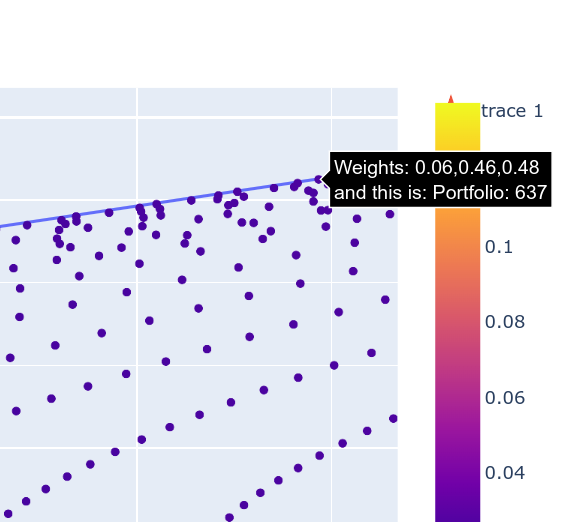


There is a multitude of portfolios, falling almost on top of the line.

I will handpick three of them, one passive that is close to the risk averse investor(the lender),
the second one will be Portfolio 637, and the last one would be for the risky investor (the borrower)
and that would be portfolio 1137.
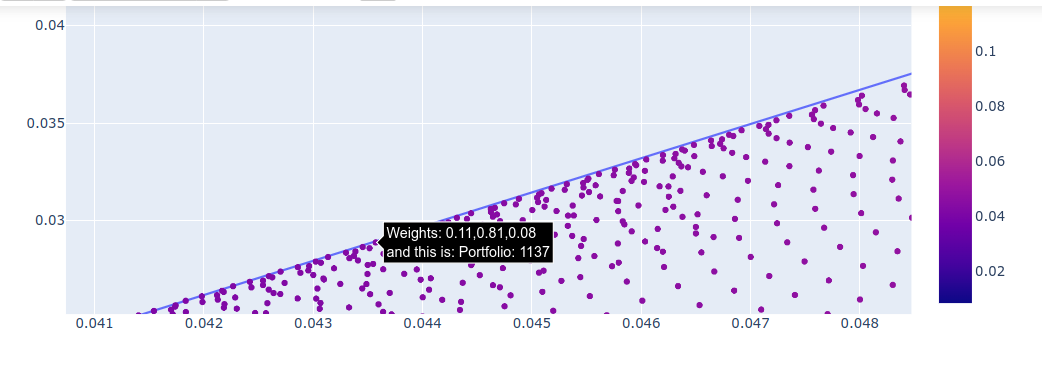

In [48]:
#632
Sharpe_A=(frontier.iloc[632,1]-rf)/portfolios2['Portfolio: 632'].std()
Sharpe_A

1.752431422949323

In [49]:
#637
Sharpe_B=(frontier.iloc[637,1]-rf)/portfolios2['Portfolio: 637'].std()
Sharpe_B

1.7566229230697654

In [50]:
#1137
Sharpe_C=(frontier.iloc[1137,1]-rf)/portfolios2['Portfolio: 1137'].std()
Sharpe_C

1.7504352310782878

In [51]:
#Lastly the returns of each portfolio
#They may seem low , but remember, inflation is accounted for, this is an already 
#discounted (for inflation) prediction
print(f"The return of portfolio A is: {frontier.iloc[632,1]}")
print(f"The return of portfolio B is: {frontier.iloc[637,1]}")
print(f"The return of portfolio C is: {frontier.iloc[1137,1]}")

The return of portfolio A is: -0.007311553232497145
The return of portfolio B is: -0.003577101929710981
The return of portfolio C is: 0.028836173136860557


In [52]:
#With Sharpe ratios being almost equal in all occations, 
#I would at least pick a portfolio that has >= 0% return
#0% AS TO minimize risk, and at the same time, avoid lose value
#portfolios with 0% returns come with  0.0272 risk , while Portfolio C
#that promises almost 2.9% returns comes is "accompanied" with 0.04357 risk.